In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S3/Office_Conrad-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
len(train_data),len(test_data)

(5760, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 3s 12ms/step - loss: 77.4546
Epoch 2/300
45/45 [==============================] - 1s 11ms/step - loss: 51.4299
Epoch 3/300
45/45 [==============================] - 1s 12ms/step - loss: 27.8349
Epoch 4/300
45/45 [==============================] - 1s 12ms/step - loss: 14.4239
Epoch 5/300
45/45 [==============================] - 1s 11ms/step - loss: 8.6808
Epoch 6/300
45/45 [==============================] - 1s 12ms/step - loss: 6.6661
Epoch 7/300
45/45 [==============================] - 1s 11ms/step - loss: 5.8365
Epoch 8/300
45/45 [==============================] - 1s 11ms/step - loss: 5.5013
Epoch 9/300
45/45 [==============================] - 1s 11ms/step - loss: 5.3596
Epoch 10/300
45/45 [==============================] - 1s 11ms/step - loss: 4.8451
Epoch 11/300
45/45 [==============================] - 1s 11ms/step - loss: 3.9375
Epoch 12/300
45/45 [==============================] - 1s 11ms/step - loss: 3.3476
Epoch 13/300
45/45 [=

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 0.9012336783956969
Root Mean Squared Error for LSTM Model for testing is: 0.7683136051465699
Mean Absolute Error for LSTM Model for training is: 0.6613598822833167
Mean Absolute Error for LSTM Model for testing is: 0.5385793851797709
MAPE for LSTM Model for training is: 0.07040111883881206
MAPE for LSTM Model for testing is: 0.06411547004235417


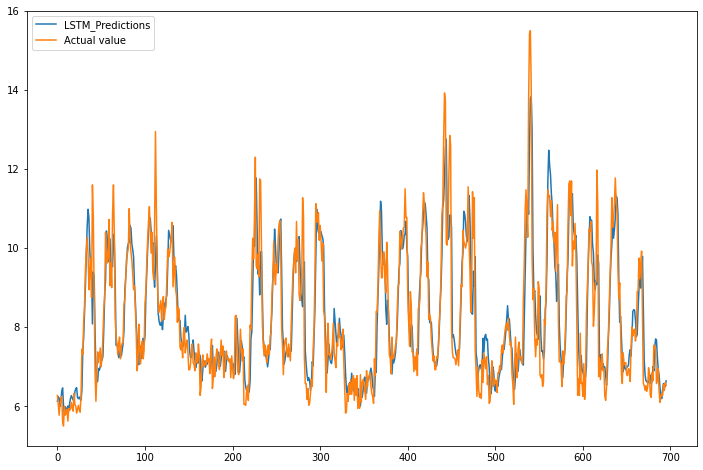

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([6.2750001]), array([6.132004], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.14299631]), array([-0.19107485]), array([-0.43251228]), array([0.07794142]), array([0.03081274]), array([-0.14054823]), array([-0.86454105]), array([-0.50568438]), array([0.20488453]), array([-0.21441031]), array([-0.10412312]), array([-0.00355625]), array([-0.38334942]), array([0.0712862]), array([-0.18117857]), array([-0.27667284]), array([-0.17051315]), array([-0.23182631]), array([-0.28700638]), array([0.22161388]), array([-0.32125711]), array([-0.44572544]), array([-0.64611435]), array([-0.29540539]), array([-0.16484261]), array([-0.33424616]), array([-0.33012295]), array([0.12208891]), array([1.04038334]), array([-0.07980061]), array([0.38626528]), array([0.1503067]), array([0.4197979]), array([0.06667709]), array([-0.25985813]), array([-1.13251209]), array([-1.81282425]), array([-0.45670891]), array([0.2194109]), array([-0.66285706]), array([3.51717567]), array([1.40522003]), array([-0.35863304]), array([-1.06435633]), array([-0.80232096]), array([0.14084816]), array([

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([3.51717567]), array([-3.17704201]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(374, 322)